In [ ]:
from google.colab import files
filesToUpload = files.upload()

import pandas as pd
import plotly.express as px

df = pd.read_csv("data.csv")

velocityList = df["Velocity"].tolist()
escapedList = df["Escaped"].tolist()

fig = px.scatter(x = velocityList, y = escapedList)
fig.show()

Saving data.csv to data.csv


In [ ]:
from google.colab import files
filesToUpload = files.upload()

import numpy as np
import pandas as pd
import plotly.express as px


df = pd.read_csv("data.csv")

velocityList = df["Velocity"].tolist()
escapedList = df["Escaped"].tolist()

velocityList = np.array(velocityList)
escapedList = np.array(escapedList)

m,c = np.polyfit(velocityList, escapedList, 1)

y = []

for x in velocityList:
  y_value = m*x + c
  y.append(y_value)

fig = px.scatter(x = velocityList, y = escapedList)
fig.update_layout(shapes = [
  dict(
    type = "line",
    y0 = min(y), y1 = max(y),
    x0 = min(velocityList), x1 = max(velocityList)
  )
])
fig.show()

Saving data.csv to data (2).csv


Saving data.csv to data (9).csv


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



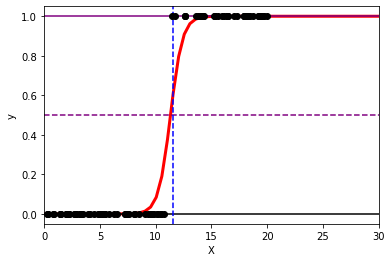

In [ ]:
from google.colab import files
filesToUpload = files.upload()

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 

df = pd.read_csv("data.csv")

velocityList = df["Velocity"].tolist()
escapedList = df["Escaped"].tolist()

X = np.reshape(velocityList, (len(velocityList), 1))
Y = np.reshape(escapedList, (len(velocityList), 1))

lr = LogisticRegression()

lr.fit(X , Y)

plt.figure()
plt.scatter(
    X.ravel(),
    Y, color = "black",
    zorder = 20
)

def model(x):
  return 1/(1 + np.exp(-x))

X_test = np.linspace(0,100,200)
chances = model(X_test * lr.coef_ + lr.intercept_).ravel()

plt.plot(X_test, chances, color = "red", linewidth = 3)

plt.axhline(y = 0, color = "black", linestyle = "-")
plt.axhline(y = 1, color = "purple", linestyle = "-")
plt.axhline(y = 0.5, color = "purple", linestyle = "--")

plt.axvline(x = X_test[23], color = "b", linestyle = "--")
plt.ylabel("y")
plt.xlabel("X")
plt.xlim(0, 30)

plt.show()